In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

In [261]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [262]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [263]:
dataset.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [264]:
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset['Loan_Amount_Term'].fillna(np.median(dataset.Loan_Amount_Term),inplace=True)
dataset['Credit_History'].fillna(np.median(dataset.Credit_History),inplace=True)
#dataset['Dependents'].fillna(np.median(dataset.Dependents),inplace=True)
dataset.dropna(how='any',inplace=True)

C:\Users\Pritam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [265]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [266]:
dataset=d
dataset.to_csv('loan-prediction1.csv',index=False)

In [267]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

#all features are important

#split the data set for training and testing
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017) #random state=same seed

In [268]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [269]:
#learning curve plotter
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [270]:
#cross validation and accuracy measures
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

Test set score svm_cls: 0.706667
Classification report for on test:
              precision    recall  f1-score   support

           0       0.53      0.43      0.48        46
           1       0.77      0.83      0.80       104

   micro avg       0.71      0.71      0.71       150
   macro avg       0.65      0.63      0.64       150
weighted avg       0.69      0.71      0.70       150


Confusion matrix for svm_cls_rbf on test:
[[20 26]
 [18 86]]
[0.78217822 0.7        0.77       0.75757576 0.71717172]


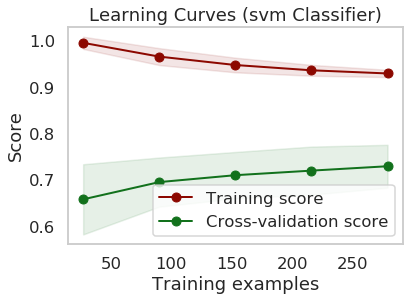

In [271]:
#support vector machine
#https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm 
svm_cls = svm.SVC(gamma=0.05,C=100,kernel='rbf')
svm_cls.fit(X_train_std, y_train)

print("Test set score svm_cls: %f" % svm_cls.score(X_test_std, y_test))
print("Classification report for on test:\n%s\n"% (classification_report(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for svm_cls_rbf on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))

cvs=cross_val_score(svm_cls, X_std, y, cv=5)
print(cvs)

plot_learning_curve(svm_cls,"Learning Curves (svm Classifier)" , X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score dt: 0.746667
Classification report for dt on test:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        46
           1       0.84      0.78      0.81       104

   micro avg       0.75      0.75      0.75       150
   macro avg       0.71      0.73      0.72       150
weighted avg       0.76      0.75      0.75       150


Confusion matrix for dt on test:
[[31 15]
 [23 81]]
[0.73267327 0.72       0.7        0.73737374 0.73737374]


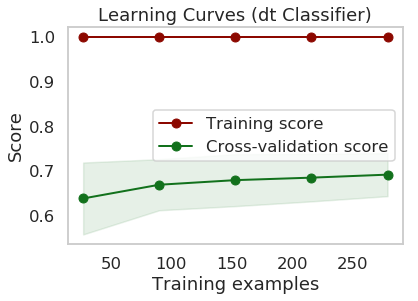

In [272]:
#dt
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',random_state=5)
dt.fit(X_train_std, y_train)

print("Test set score dt: %f" % dt.score(X_test_std, y_test))
print("Classification report for dt on test:\n%s\n"% (classification_report(y_test, dt.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))

cvs=cross_val_score(dt , X_std, y, cv=5)
print(cvs)

plot_learning_curve(dt,"Learning Curves (dt Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


In [273]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree.pdf") 
Image(graph.create_png())

'from sklearn.externals.six import StringIO\nimport pydotplus\nfrom IPython.display import Image  \n\nimport os\nimport sys\n\ndef conda_fix(graph):\n        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")\n        paths = ("dot", "twopi", "neato", "circo", "fdp")\n        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}\n        graph.set_graphviz_executables(paths)\n        \n        \nfrom sklearn import tree\n\nbuffer = StringIO()\ntree.export_graphviz(dt, out_file=buffer, \n                         feature_names=X.columns,  \n                         class_names=X.columns,  \n                         filled=True, rounded=True,  \n                         special_characters=True)\ngraph = pydotplus.graph_from_dot_data(buffer.getvalue())\nconda_fix(graph)\ngraph.write_pdf("loan_tree.pdf") \nImage(graph.create_png())'

Test set score ada: 0.760000
Classification report for ada on test:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        46
           1       0.85      0.80      0.82       104

   micro avg       0.76      0.76      0.76       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.77      0.76      0.76       150


Confusion matrix for ada on test:
[[31 15]
 [21 83]]
[0.73267327 0.69       0.72       0.75757576 0.74747475]


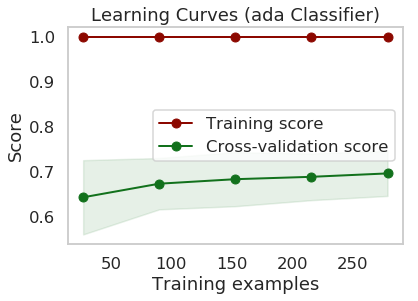

In [274]:
#ada-booster #boosting
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
ada.fit(X_train_std, y_train)

print("Test set score ada: %f" % ada.score(X_test_std, y_test))
print("Classification report for ada on test:\n%s\n"% (classification_report(y_test, ada.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))

cvs=cross_val_score(ada , X_std, y, cv=5)
print(cvs)

plot_learning_curve(ada,"Learning Curves (ada Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score rf: 0.813333
Classification report for rf on test:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        46
           1       0.85      0.89      0.87       104

   micro avg       0.81      0.81      0.81       150
   macro avg       0.79      0.76      0.77       150
weighted avg       0.81      0.81      0.81       150


Confusion matrix for rf on test:
[[29 17]
 [11 93]]
[0.79207921 0.75       0.77       0.7979798  0.77777778]


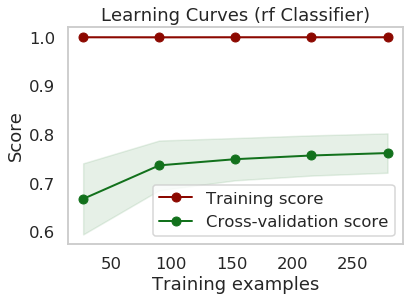

In [275]:
#random forest #baggibg
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features='auto')
rf.fit(X_train_std, y_train)

print("Test set score rf: %f" % rf.score(X_test_std, y_test))
print("Classification report for rf on test:\n%s\n"% (classification_report(y_test, rf.predict(X_test_std))))
print("Confusion matrix for rf on test:\n%s" % (confusion_matrix(y_test, rf.predict(X_test_std))))

cvs=cross_val_score(rf, X_std, y, cv=5)
print(cvs)

plot_learning_curve(rf,"Learning Curves (rf Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test set score mlp: 0.800000
Classification report for mlp on test:
              precision    recall  f1-score   support

           0       0.72      0.57      0.63        46
           1       0.82      0.90      0.86       104

   micro avg       0.80      0.80      0.80       150
   macro avg       0.77      0.73      0.75       150
weighted avg       0.79      0.80      0.79       150


Confusion matrix for mlp on test:
[[26 20]
 [10 94]]


C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[0.8019802  0.65       0.77       0.72727273 0.78787879]


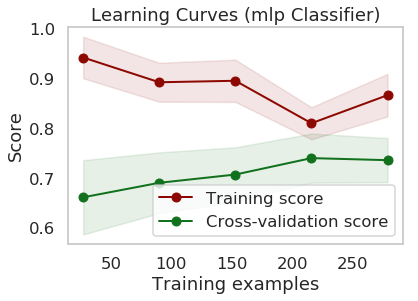

In [276]:
#perceptron #feed forward
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,2), activation='logistic',max_iter=1000,learning_rate_init=0.005,tol=1e-41,solver='adam')
mlp.fit(X_train_std, y_train)

print("Test set score mlp: %f" % mlp.score(X_test_std, y_test))
print("Classification report for mlp on test:\n%s\n"% (classification_report(y_test, mlp.predict(X_test_std))))
print("Confusion matrix for mlp on test:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))

cvs=cross_val_score(mlp, X_std, y, cv=5)
print(cvs)

plot_learning_curve(mlp,"Learning Curves (mlp Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


Test set score knn: 0.786667
Classification report for knn on test:
              precision    recall  f1-score   support

           0       0.69      0.54      0.61        46
           1       0.82      0.89      0.85       104

   micro avg       0.79      0.79      0.79       150
   macro avg       0.76      0.72      0.73       150
weighted avg       0.78      0.79      0.78       150


Confusion matrix for knn on test:
[[25 21]
 [11 93]]
[0.76237624 0.72       0.76       0.75757576 0.77777778]


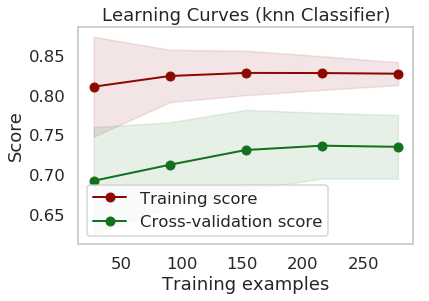

In [277]:
#KNN 3
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=3)
knn.fit(X_train_std, y_train)

print("Test set score knn: %f" % knn.score(X_test_std, y_test))
print("Classification report for knn on test:\n%s\n"% (classification_report(y_test, knn.predict(X_test_std))))
print("Confusion matrix for knn on test:\n%s" % (confusion_matrix(y_test, knn.predict(X_test_std))))

cvs=cross_val_score(knn, X_std, y, cv=5)
print(cvs)

plot_learning_curve(knn,"Learning Curves (knn Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


Test set score lr: 0.853333
Classification report for lr on test:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        46
           1       0.85      0.96      0.90       104

   micro avg       0.85      0.85      0.85       150
   macro avg       0.86      0.79      0.81       150
weighted avg       0.86      0.85      0.84       150


Confusion matrix for lr on test:
[[ 28  18]
 [  4 100]]
[0.81188119 0.76       0.77       0.85858586 0.78787879]


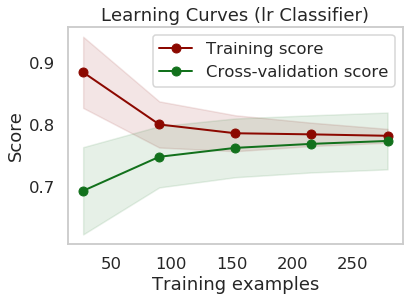

In [278]:
#logistic regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression as LR
lr=LR(C=1.0,solver='newton-cg',penalty='l2',multi_class='ovr',max_iter=500)
lr.fit(X_train_std, y_train)

print("Test set score lr: %f" % lr.score(X_test_std, y_test))
print("Classification report for lr on test:\n%s\n"% (classification_report(y_test, lr.predict(X_test_std))))
print("Confusion matrix for lr on test:\n%s" % (confusion_matrix(y_test, lr.predict(X_test_std))))

cvs=cross_val_score(lr, X_std, y, cv=5)
print(cvs)

plot_learning_curve(lr,"Learning Curves (lr Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


In [279]:
#saving models
from sklearn.externals import joblib #dumping and loading model
joblib.dump(svm_cls,'svm_cls_model.joblib')
joblib.dump(dt,'dt_model.joblib')
joblib.dump(ada,'ada_model.joblib')
joblib.dump(mlp,'mlp_model.joblib')
joblib.dump(knn,'knn_model.joblib')
joblib.dump(lr,'lr_model.joblib')
joblib.dump(rf,'rf_model.joblib')

['rf_model.joblib']

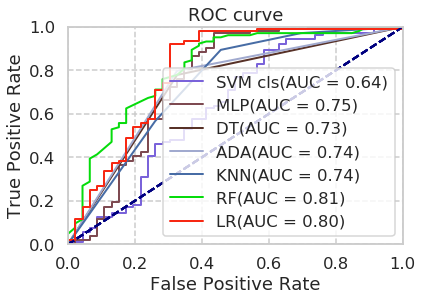

In [280]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

svm_cls_pred=svm_cls.predict(X_test_std)
mlp_pred=mlp.predict(X_test_std)
dt_pred=dt.predict(X_test_std)
ada_pred=ada.predict(X_test_std)
knn_pred=knn.predict(X_test_std)
rf_pred=rf.predict(X_test_std)
lr_pred=lr.predict(X_test_std)


svm_cls_pred_proba=svm_cls.decision_function(X_test_std)
mlp_pred_proba=mlp.predict_proba(X_test_std)[:,1]
dt_pred_proba=dt.predict_proba(X_test_std)[:,1]
ada_pred_proba=ada.predict_proba(X_test_std)[:,1]
knn_pred_proba=knn.predict_proba(X_test_std)[:,1]
rf_pred_proba=rf.predict_proba(X_test_std)[:,1]
lr_pred_proba=lr.predict_proba(X_test_std)[:,1]


plotAUC(y_test,svm_cls_pred_proba,'SVM cls')
plotAUC(y_test,mlp_pred_proba,'MLP')
plotAUC(y_test,dt_pred_proba,'DT')
plotAUC(y_test,ada_pred_proba,'ADA')
plotAUC(y_test,knn_pred_proba,'KNN')
plotAUC(y_test,rf_pred_proba,'RF')
plotAUC(y_test,lr_pred_proba,'LR')
plt.show()

In [281]:
X_std.shape

(499, 11)

In [282]:
#L1 based feature selection
from sklearn.feature_selection import SelectFromModel

In [283]:
model = SelectFromModel(dt, prefit=True)
X_std_new = model.transform(X_std)
X_std_new.shape

(499, 4)

In [284]:
X_std_new

array([[ 0.16081544, -0.58680892, -0.01903249,  0.37486381],
       [-0.12101184, -0.02276446, -0.24698535,  0.37486381],
       [-0.47340725, -0.58680892, -1.01458004,  0.37486381],
       ...,
       [ 0.65568278, -0.49704058,  1.30058458,  0.37486381],
       [ 0.54682532, -0.58680892,  0.48346765,  0.37486381],
       [-0.12101184, -0.58680892, -0.18508256, -2.66763548]])

In [285]:

X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [286]:
#top 8 feature selection logistic regression
from sklearn.feature_selection import RFE
lr=LR(C=0.01)
rfe = RFE(lr, 8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X_rfe = rfe.fit_transform(X,y)
X_rfe
X

Num Features: 8
Selected Features: [ True  True  True  True  True False False  True False  True  True]
Feature Ranking: [1 1 1 1 1 4 3 1 2 1 1]


C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2
6,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2
7,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1
8,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1


In [287]:
#dt
rfe = RFE(dt, 10)
X_rfe = rfe.fit_transform(X_std,y)
dt.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')
